<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_4X/blob/main/GQtest_groupwise_(y_hat)_0_3_0_7_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_4X/groupwise_0.3_0.7'

In [4]:
os.listdir(base_path)

['data_groupwise_0.3_0.7_n20.csv',
 'data_groupwise_0.3_0.7_n30.csv',
 'data_groupwise_0.3_0.7_n60.csv',
 'data_groupwise_0.3_0.7_n120.csv',
 'data_groupwise_0.3_0.7_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.3_0.7_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,99.710079,94.481610,88.485011,67.669454,0.623302,360.969457,360.495515,0.473942
1,0.0,1.0,60.838750,27.717740,61.096735,46.904845,0.793755,207.351826,206.585460,0.766366
2,0.0,2.0,32.394299,25.533415,20.580031,28.699585,0.364976,117.572306,117.210074,0.362232
3,0.0,3.0,44.916843,46.276958,64.551541,46.123203,0.289419,212.157964,211.845807,0.312156
4,0.0,4.0,55.934658,74.903951,90.924675,96.417837,-0.448261,327.732860,328.369956,-0.637097
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.877203,45.038226,95.076611,98.792645,0.203109,292.987794,293.653684,-0.665890
19996,999.0,16.0,95.846720,53.328636,93.696316,73.621583,0.398568,326.891824,327.065608,-0.173785
19997,999.0,17.0,29.183320,28.373784,34.808176,40.532680,-0.889937,142.008022,142.416699,-0.408676
19998,999.0,18.0,69.270271,91.385074,43.815156,29.254337,-1.630266,242.094572,243.222401,-1.127829


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,99.710079,94.481610,88.485011,67.669454,0.623302,360.969457,360.495515,0.473942
1,0.0,1.0,60.838750,27.717740,61.096735,46.904845,0.793755,207.351826,206.585460,0.766366
2,0.0,2.0,32.394299,25.533415,20.580031,28.699585,0.364976,117.572306,117.210074,0.362232
3,0.0,3.0,44.916843,46.276958,64.551541,46.123203,0.289419,212.157964,211.845807,0.312156
4,0.0,4.0,55.934658,74.903951,90.924675,96.417837,-0.448261,327.732860,328.369956,-0.637097
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.877203,45.038226,95.076611,98.792645,0.203109,292.987794,293.653684,-0.665890
19996,999.0,16.0,95.846720,53.328636,93.696316,73.621583,0.398568,326.891824,327.065608,-0.173785
19997,999.0,17.0,29.183320,28.373784,34.808176,40.532680,-0.889937,142.008022,142.416699,-0.408676
19998,999.0,18.0,69.270271,91.385074,43.815156,29.254337,-1.630266,242.094572,243.222401,-1.127829


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    99.710079  94.481610  88.485011  67.669454  0.623302  360.969457   
      1.0    60.838750  27.717740  61.096735  46.904845  0.793755  207.351826   
      2.0    32.394299  25.533415  20.580031  28.699585  0.364976  117.572306   
      3.0    44.916843  46.276958  64.551541  46.123203  0.289419  212.157964   
      4.0    55.934658  74.903951  90.924675  96.417837 -0.448261  327.732860   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   43.877203  45.038226  95.076611  98.792645  0.203109  292.987794   
      16.0   95.846720  53.328636  93.696316  73.621583  0.398568  326.891824   
      17.0   29.183320  28.373784  34.808176  40.532680 -0.889937  142.008022   
      18.0   69.270271  91.385074  43.815156  29.254337 -1.630266  242.094572   
      19.0   50.605214  22.265668  45.000082  40.380693 -1.206103  167.045553   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    360.495515  0.473942  
      1.0    206.585460  0.766366  
      2.0    117.210074  0.362232  
      3.0    211.845807  0.312156  
      4.0    328.369956 -0.637097  
...                 ...       ...  
999.0 15.0   293.653684 -0.665890  
      16.0   327.065608 -0.173785  
      17.0   142.416699 -0.408676  
      18.0   243.222401 -1.127829  
      19.0   167.888930 -0.843376  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    99.710079  94.481610  88.485011  67.669454  0.623302  360.969457   
      1.0    60.838750  27.717740  61.096735  46.904845  0.793755  207.351826   
      2.0    32.394299  25.533415  20.580031  28.699585  0.364976  117.572306   
      3.0    44.916843  46.276958  64.551541  46.123203  0.289419  212.157964   
      4.0    55.934658  74.903951  90.924675  96.417837 -0.448261  327.732860   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   43.877203  45.038226  95.076611  98.792645  0.203109  292.987794   
      16.0   95.846720  53.328636  93.696316  73.621583  0.398568  326.891824   
      17.0   29.183320  28.373784  34.808176  40.532680 -0.889937  142.008022   
      18.0   69.270271  91.385074  43.815156  29.254337 -1.630266  242.094572   
      19.0   50.605214  22.265668  45.000082  40.380693 -1.206103  167.045553   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    360.495515  0.473942  
      1.0    206.585460  0.766366  
      2.0    117.210074  0.362232  
      3.0    211.845807  0.312156  
      4.0    328.369956 -0.637097  
...                 ...       ...  
999.0 15.0   293.653684 -0.665890  
      16.0   327.065608 -0.173785  
      17.0   142.416699 -0.408676  
      18.0   243.222401 -1.127829  
      19.0   167.888930 -0.843376  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,99.710079,94.481610,88.485011,67.669454,0.623302,360.969457,360.495515,0.473942
1,0.0,1.0,60.838750,27.717740,61.096735,46.904845,0.793755,207.351826,206.585460,0.766366
2,0.0,2.0,32.394299,25.533415,20.580031,28.699585,0.364976,117.572306,117.210074,0.362232
3,0.0,3.0,44.916843,46.276958,64.551541,46.123203,0.289419,212.157964,211.845807,0.312156
4,0.0,4.0,55.934658,74.903951,90.924675,96.417837,-0.448261,327.732860,328.369956,-0.637097
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.877203,45.038226,95.076611,98.792645,0.203109,292.987794,293.653684,-0.665890
19996,999.0,16.0,95.846720,53.328636,93.696316,73.621583,0.398568,326.891824,327.065608,-0.173785
19997,999.0,17.0,29.183320,28.373784,34.808176,40.532680,-0.889937,142.008022,142.416699,-0.408676
19998,999.0,18.0,69.270271,91.385074,43.815156,29.254337,-1.630266,242.094572,243.222401,-1.127829


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    99.710079  94.481610  88.485011  67.669454  0.623302  360.969457   
      1.0    60.838750  27.717740  61.096735  46.904845  0.793755  207.351826   
      2.0    32.394299  25.533415  20.580031  28.699585  0.364976  117.572306   
      3.0    44.916843  46.276958  64.551541  46.123203  0.289419  212.157964   
      4.0    55.934658  74.903951  90.924675  96.417837 -0.448261  327.732860   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   43.877203  45.038226  95.076611  98.792645  0.203109  292.987794   
      16.0   95.846720  53.328636  93.696316  73.621583  0.398568  326.891824   
      17.0   29.183320  28.373784  34.808176  40.532680 -0.889937  142.008022   
      18.0   69.270271  91.385074  43.815156  29.254337 -1.630266  242.094572   
      19.0   50.605214  22.265668  45.000082  40.380693 -1.206103  167.045553   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    360.495515  0.473942  
      1.0    206.585460  0.766366  
      2.0    117.210074  0.362232  
      3.0    211.845807  0.312156  
      4.0    328.369956 -0.637097  
...                 ...       ...  
999.0 15.0   293.653684 -0.665890  
      16.0   327.065608 -0.173785  
      17.0   142.416699 -0.408676  
      18.0   243.222401 -1.127829  
      19.0   167.888930 -0.843376  

[20000 rows x 8 columns]

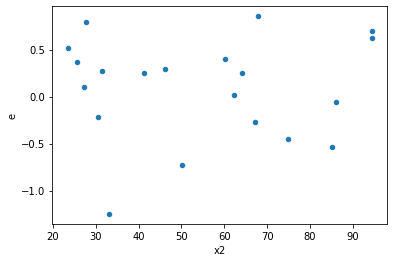

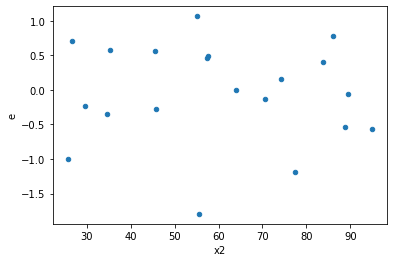

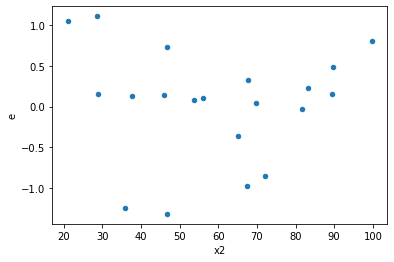

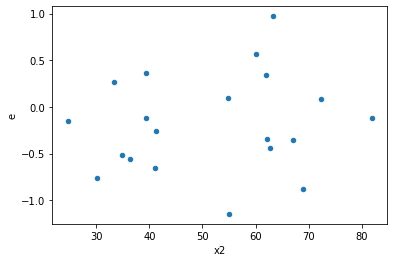

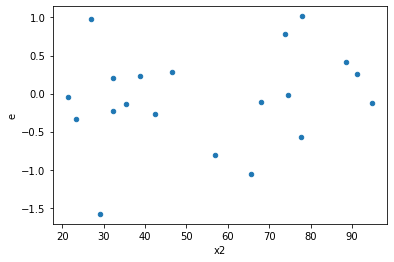

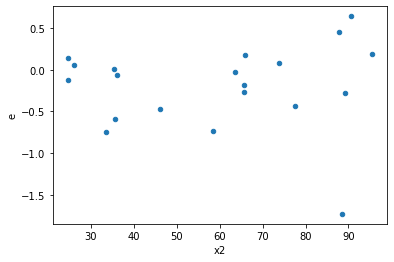

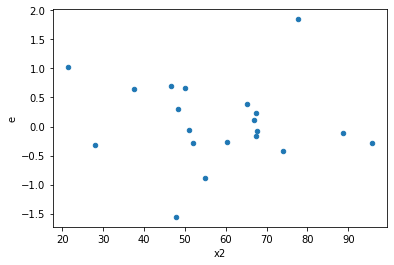

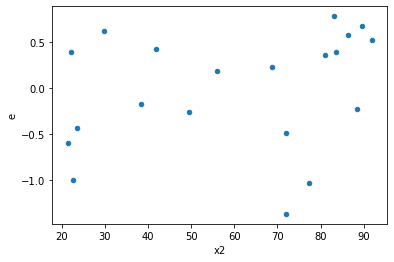

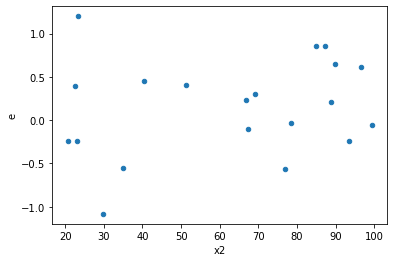

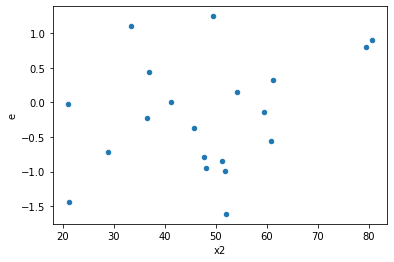

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,4.0,4.0,1.3556814215480564,1.8449391661016161,0.3389203553870141,0.46123479152540403,1.3608943345958633,0.7724908965445552,0.6137545517277224,0.3862454482722776,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,0.4504463000735851,1.135093257653887,0.11261157501839628,0.28377331441347176,2.5199302502173015,0.3925463745552171,0.8037268127223914,0.19627318727760856,Reject001=1 : Homoscedasticity
4.0,4.0,4.0,0.7560421448096725,1.5207765535065838,0.18901053620241812,0.38019413837664595,2.011497062626617,0.5151282337949727,0.7424358831025136,0.2575641168974864,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,0.4622596308440056,2.9773279192083537,0.1155649077110014,0.7443319798020884,6.440813171966306,0.09866080049276871,0.9506695997536156,0.049330400246384354,Reject001=1 : Homoscedasticity
9.0,4.0,4.0,0.6834313632488387,4.746073785774184,0.17085784081220967,1.186518446443546,6.944477589106676,0.08708753258341928,0.9564562337082904,0.04354376629170964,Reject001=1 : Homoscedasticity
10.0,4.0,4.0,1.2721133971008238,1.7013221263837526,0.31802834927520596,0.42533053159593814,1.3373981676956672,0.7849822087192537,0.6075088956403731,0.39249110435962686,Reject001=1 : Homoscedasticity
12.0,4.0,4.0,2.30323461089152,4.699137381618206,0.57580865272288,1.1747843454045515,2.040233921198022,0.5067943812934337,0.7466028093532832,0.25339719064671684,Reject001=1 : Homoscedasticity
13.0,4.0,4.0,0.7128330664812997,1.6515099368631527,0.17820826662032493,0.4128774842157882,2.3168256559917566,0.43576791164529594,0.782116044177352,0.21788395582264797,Reject001=1 : Homoscedasticity
14.0,4.0,4.0,0.2537814533425441,4.4023351650439455,0.06344536333563602,1.1005837912609864,17.346953873346486,0.01717705312080753,0.9914114734395962,0.008588526560403764,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,1.3556814215480564,1.8449391661016161,0.3389203553870141,0.46123479152540403,1.3608943345958633,0.7724908965445552,Reject001=1 : Homoscedasticity
1.0,4.0,4.0,2.742543212787538,1.0922658317040663,0.6856358031968846,0.2730664579260166,0.3982675009863857,0.39433607065142656,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,2.052578030594612,2.0111452456750034,0.513144507648653,0.5027863114187509,0.9798142704920182,0.9847068760325172,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,0.4504463000735851,1.135093257653887,0.11261157501839628,0.28377331441347176,2.5199302502173015,0.3925463745552171,Reject001=1 : Homoscedasticity
4.0,4.0,4.0,0.7560421448096725,1.5207765535065838,0.18901053620241812,0.38019413837664595,2.011497062626617,0.5151282337949727,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,0.4622596308440056,2.9773279192083537,0.1155649077110014,0.7443319798020884,6.440813171966306,0.09866080049276871,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,2.8863893328703187,0.23783552030200283,0.7215973332175797,0.05945888007550071,0.08239897424561624,0.03300656592939667,Reject001=1 : Homoscedasticity
7.0,4.0,4.0,1.0826770139166337,0.3499034691599482,0.27066925347915843,0.08747586728998705,0.32318361308342214,0.29965577777659985,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,1.3048816440937436,1.137862282091303,0.3262204110234359,0.28446557052282573,0.872004206083811,0.8975993201611121,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      973
Reject001=0 : Heteroscedasticity     27
Name: Result_test, dtype: int64